In [17]:
import os
import re
import emoji
import numpy as np
import unicodedata
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#pca
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
import itertools
import collections

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Configuración warnings

import warnings
warnings.filterwarnings('ignore')


#modelado TSE MDS
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler

# scikit-learn
from sklearn.linear_model            import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.svm                     import SVC
from sklearn.ensemble                import RandomForestClassifier
from sklearn.ensemble                import GradientBoostingClassifier
from sklearn.preprocessing           import LabelEncoder,OneHotEncoder
from sklearn.model_selection         import StratifiedKFold
from sklearn.model_selection         import validation_curve
from sklearn.model_selection         import learning_curve
from sklearn.model_selection         import train_test_split
from sklearn.metrics                 import confusion_matrix
from sklearn.metrics                 import accuracy_score
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import cross_val_predict
from sklearn.model_selection         import cross_val_score
from sklearn                         import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition           import TruncatedSVD
from sklearn.naive_bayes             import GaussianNB
from sklearn.metrics         import roc_curve, roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [18]:
df=pd.read_csv("C:/Users/MX03932000/Documents/Personales/Mod_3/p1/df.csv")

In [21]:
df_=df[['age', 'amount', 'debt', 'term', 'enrichment_RAD', 'enrichment_TAX',
       'enrichment_B', 'gender_F', 'merchant_M1823072687',
       'category_es_transportation','fraud']]

In [22]:
X_=df_.drop(columns=["fraud"])
y_=df_[["fraud"]]

In [23]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X_, y_)
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({'fraud': 1})


In [29]:
ss = StandardScaler()
df_transformed = ss.fit_transform(X)
df_transformed

array([[ 0.82615504, -0.43105177, -0.38841568, ..., -1.36531085,
        -0.58517583,  1.15150286],
       [ 0.82615504, -0.41575058, -0.36276413, ...,  0.73243394,
        -0.58517583, -0.86843032],
       [ 0.82615504, -0.38021382, -0.31156052, ..., -1.36531085,
        -0.58517583,  1.15150286],
       ...,
       [ 0.05248865, -0.29631407, -0.31384266, ...,  0.73243394,
        -0.58517583, -0.86843032],
       [-0.72117775, -0.12286419, -0.14229503, ..., -1.36531085,
        -0.58517583, -0.86843032],
       [-0.72117775, -0.13586164, -0.27996937, ...,  0.73243394,
        -0.58517583, -0.86843032]])

In [30]:
pca=PCA(n_components=2)

In [31]:
pca.fit(df_transformed)

PCA(n_components=2)

In [32]:
pca.explained_variance_ratio_

array([0.25074397, 0.18948369])

In [33]:
pca.explained_variance_ratio_.cumsum()

array([0.25074397, 0.44022766])

In [34]:
Xp = pd.DataFrame(pca.transform(df_transformed),columns=['p1','p2'])

In [35]:
Xp['label'] = df[["fraud"]]

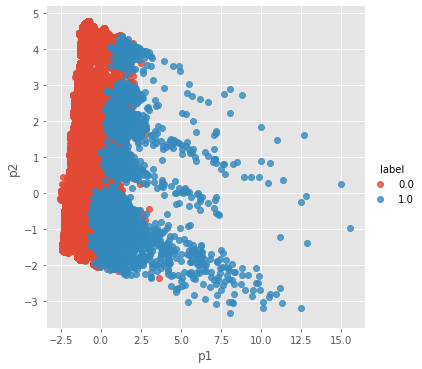

In [37]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='label')


In [41]:
#MDS


In [47]:
mds = MDS(n_components=2,n_jobs=-1)

In [48]:
X_sample=X.sample(frac=0.005)


In [49]:
Xm  = pd.DataFrame(mds.fit_transform(X_sample),columns=['d1','d2'])

In [50]:
Xm['label'] =y

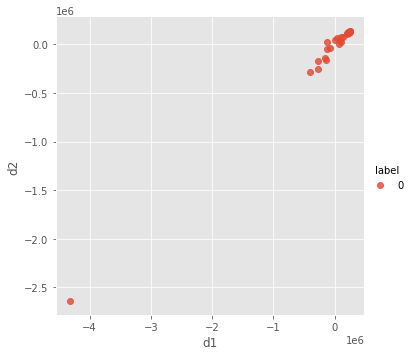

In [51]:
sns.lmplot(data=Xm.sample(frac=0.005),x='d1',y='d2',fit_reg=False,hue='label')

In [52]:
#TSN

In [53]:
tsne = TSNE(n_components=2, perplexity=20)

In [54]:
#hacemos muestra muy pequeña
#.01 corre muy rapido y solo gráfica 1 punto
X_sample=X.sample(frac=.005)


In [55]:
Xt  = pd.DataFrame(tsne.fit_transform(X_sample),columns=['t1','t2'])

In [56]:
Xt['label'] = y

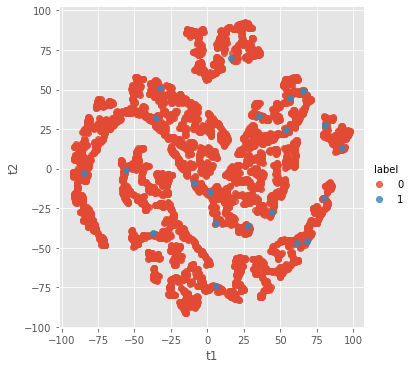

In [57]:
sns.lmplot(data=Xt,x='t1',y='t2',fit_reg=False,hue='label')

In [58]:
tsne.kl_divergence_

0.6374850869178772

In [59]:
mds.dissimilarity_matrix_

array([[     0.        , 307355.88013028, 533834.15360235, ...,
         15014.44438505,  17206.96642132,  25703.913992  ],
       [307355.88013028,      0.        , 226489.30756112, ...,
        292599.10084031, 290722.8245428 , 282395.98619799],
       [533834.15360235, 226489.30756112,      0.        , ...,
        519057.32955173, 517163.86839911, 508814.24827687],
       ...,
       [ 15014.44438505, 292599.10084031, 519057.32955173, ...,
             0.        ,   2470.02966592,  10734.8612533 ],
       [ 17206.96642132, 290722.8245428 , 517163.86839911, ...,
          2470.02966592,      0.        ,   8508.38850177],
       [ 25703.913992  , 282395.98619799, 508814.24827687, ...,
         10734.8612533 ,   8508.38850177,      0.        ]])

In [60]:
mds.dissimilarity_matrix_.shape

(5874, 5874)